In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from bandits import *
from client import *
from server import *
from bandits_improved import *
from client_improved import *
from server_improved import *

Performance

In [3]:
T = 10000
K = 9
M = 4
alpha_list = np.array([0, 0.5, 0.9, 1])


In [4]:
# global true mean for each arm
arms_true_means = np.random.random((M))

means = np.random.multivariate_normal(list(arms_true_means), np.eye(M), size=M)

n_simu = 10

print(means)

[[ 0.22108215  0.6094811   1.33220912 -0.08128906]
 [ 0.48454419  1.79194883  1.48909337  0.21329231]
 [ 1.39715638  2.32834773 -1.11586514  1.79716069]
 [-0.2573361   2.0234009   1.8496911   0.72992601]]


In [5]:
cohorts = [
    Cohort(np.random.multivariate_normal(list(arms_true_means), np.eye(M), size=2), 0, 5000),
    Cohort(np.random.multivariate_normal(list(arms_true_means), np.eye(M), size=5), 1000, 5000),
    Cohort(np.random.multivariate_normal(list(arms_true_means), np.eye(M), size=10), 6000, 2000),
    Cohort(np.random.multivariate_normal(list(arms_true_means), np.eye(M), size=1), 8000, 500)
] 

In [6]:
def fp(p):
    return 2**p*np.log(T)

In [7]:
# try to load for a warm restart
try:
    regret_reward = np.load('scores/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('scores/raw_regret.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('scores/local_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('scores/global_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('scores/mixed_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}

In [8]:
regret_reward.keys()

dict_keys(['0.0', '0.2', '0.5', '0.9', '1.0'])

In [9]:
regret_reward = {}
raw_regret = {}
local_reward = {}
global_reward = {}
mixed_reward = {}

In [10]:
pfed = None

In [12]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            pfed = PFEDUCB_v2(fp, T, cohorts, alpha) # simulate a run with the chosen parameters
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    # np.save('scores/raw_regret.npy', raw_regret)
    # np.save('scores/local_reward.npy',local_reward)
    # np.save('scores/global_reward.npy',global_reward)
    # np.save('scores/mixed_reward.npy',mixed_reward)
    # np.save('scores/regret_reward.npy', regret_reward)
    # del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(round(alpha,2))]))
    # np.save('scores/raw_regret.npy', raw_regret)
    # np.save('scores/local_reward.npy',local_reward)
    # np.save('scores/global_reward.npy',global_reward)
    # np.save('scores/mixed_reward.npy',mixed_reward)
    # np.save('scores/regret_reward.npy', regret_reward)
    # del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:0.0:   0%|          | 0/10 [00:00<?, ?it/s]

> /Users/georgivitanov/Dev/dfki/DSA/AI4Nof1/PF_MAB/bandits.py(85)simulate()
     83             clients_aux = []
     84             pdb.set_trace()
---> 85             for cohort in self.cohorts:
     86                 if cohort.t_0 >= t and cohort.t_0 + cohort.T_c >= t:
     87                     active_cohorts.append(cohort)

> /Users/georgivitanov/Dev/dfki/DSA/AI4Nof1/PF_MAB/bandits.py(86)simulate()
     84             pdb.set_trace()
     85             for cohort in self.cohorts:
---> 86                 if cohort.t_0 >= t and cohort.t_0 + cohort.T_c >= t:
     87                     active_cohorts.append(cohort)
     88                     # plays_list.append(cohort.means.shape[0])

> /Users/georgivitanov/Dev/dfki/DSA/AI4Nof1/PF_MAB/bandits.py(87)simulate()
     85             for cohort in self.cohorts:
     86                 if cohort.t_0 >= t and cohort.t_0 + cohort.T_c >= t:
---> 87                     active_cohorts.append(cohort)
     88                     # plays_list.

Simulating P-Fed-UCB, alpha:0.0:   0%|          | 0/10 [00:24<?, ?it/s]


In [ ]:
len(raw_regret[str(round(alpha_list[0],2))][0])

10000

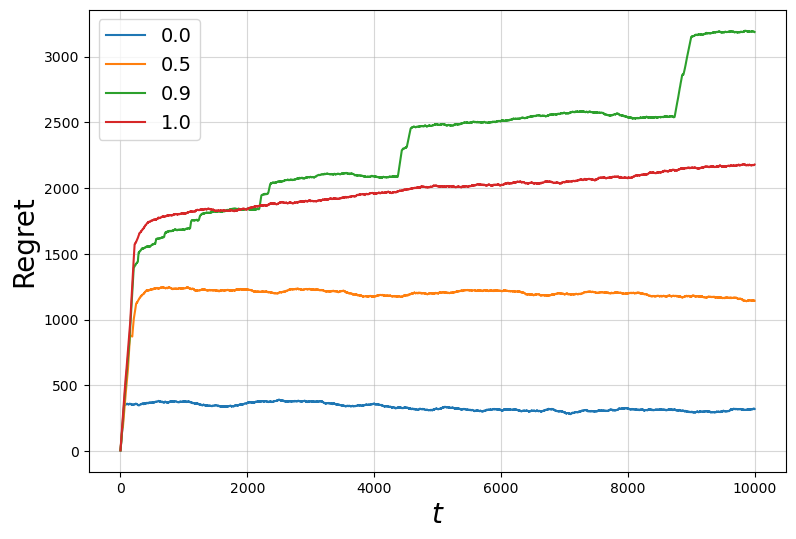

In [ ]:
# try:
#     regret_reward = np.load('scores/regret_reward.npy',allow_pickle=True).item()
# except FileNotFoundError:
#     regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=str(alpha))
plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)

New clients on old method

In [ ]:
n_simu = 10

means_new = np.array(
    [[1.05, 0, 0, 0, 0.9, 0.45, 0.3, 0.35, 0.5],
    [0, 1, 0.02, 0, 0.35, 0.9, 0.35, 0.3, 0.5],
    [0, 0, 1, 0.01, 0.3, 0.35, 0.89, 0.3, 0.5],
    [0, 0, 0, 1, 0.4, 0.3, 0.35, 0.9, 0.5]]
)

In [ ]:
regret_reward = {}

In [ ]:
len(raw_regret[str(round(alpha_list[0],2))][0])

10000

In [ ]:
# for alpha in alpha_list:
#     raw_regret[str(round(alpha,2))] = []
#     local_reward[str(round(alpha,2))] = []
#     global_reward[str(round(alpha,2))] = []
#     mixed_reward[str(round(alpha,2))] = []

In [ ]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu#-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            # pfed = PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            pfed.update_means(means_new)
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    # np.save('scores/raw_regret.npy', raw_regret)
    # np.save('scores/local_reward.npy',local_reward)
    # np.save('scores/global_reward.npy',global_reward)
    # np.save('scores/mixed_reward.npy',mixed_reward)
    # np.save('scores/regret_reward.npy', regret_reward)
    # del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(round(alpha,2))]))
    # np.save('scores/raw_regret.npy', raw_regret)
    # np.save('scores/local_reward.npy',local_reward)
    # np.save('scores/global_reward.npy',global_reward)
    # np.save('scores/mixed_reward.npy',mixed_reward)
    # np.save('scores/regret_reward.npy', regret_reward)
    # del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:0.0:   0%|          | 0/10 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (4,) (9,) 

In [ ]:
len(regret_reward[str(round(alpha_list[0],2))][0])

10000

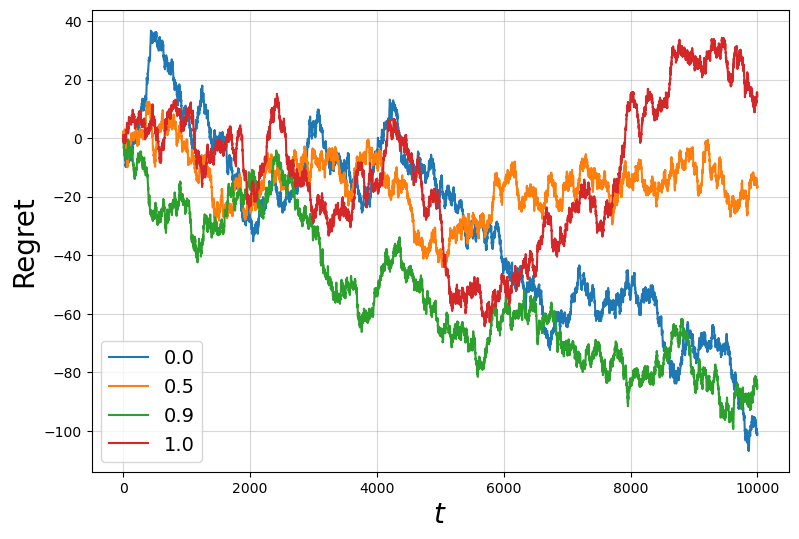

In [ ]:
# try:
#     regret_reward = np.load('scores/regret_reward.npy',allow_pickle=True).item()
# except FileNotFoundError:
#     regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=str(alpha))
plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)

3rd cohort

In [ ]:
n_simu = 10

means_new = np.array(
    [[0.95, 0, 0, 0.1, 0.95, 0.45, 0.3, 0.35, 0.5],
    [0.2, 0.9, 0.02, 0, 0.35, 0.92, 0.35, 0.3, 0.5],
    [0, 0, 1.05, 0.01, 0.3, 0.35, 0.85, 0.35, 0.5],
    [0, 0.02, 0, 1.02, 0.42, 0.3, 0.35, 0.9, 0.51]]
)

In [ ]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu#-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            # pfed = PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            pfed.update_means(means_new)
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    # np.save('scores/raw_regret.npy', raw_regret)
    # np.save('scores/local_reward.npy',local_reward)
    # np.save('scores/global_reward.npy',global_reward)
    # np.save('scores/mixed_reward.npy',mixed_reward)
    # np.save('scores/regret_reward.npy', regret_reward)
    # del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(round(alpha,2))]))
    # np.save('scores/raw_regret.npy', raw_regret)
    # np.save('scores/local_reward.npy',local_reward)
    # np.save('scores/global_reward.npy',global_reward)
    # np.save('scores/mixed_reward.npy',mixed_reward)
    # np.save('scores/regret_reward.npy', regret_reward)
    # del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:1.0: 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


In [ ]:
len(regret_reward[str(round(alpha_list[0],2))][0])

10000

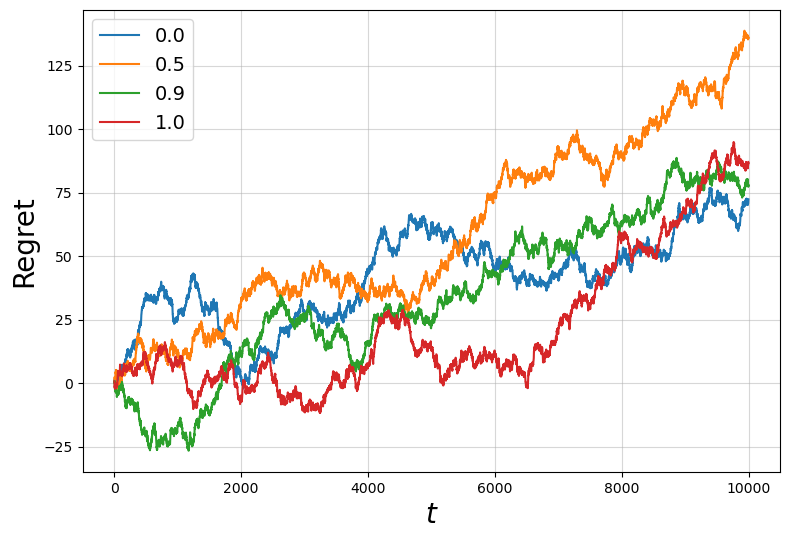

In [ ]:
# try:
#     regret_reward = np.load('scores/regret_reward.npy',allow_pickle=True).item()
# except FileNotFoundError:
#     regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=str(alpha))
plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)